# Mean-variance relationship

## Set environment

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

In [2]:
FD_WRK

[1] "/work/kk319"

In [4]:
FD_DAT=file.path(FD_WRK, "out/CombEffect_STARR/count_fragment")

cat(FD_DAT, "\n")
Sys.glob(file.path(FD_DAT, "dat*"))

/work/kk319/out/CombEffect_STARR/count_fragment 


[1] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dex_chr17.csv"  
[2] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dex_per1.csv"   
[3] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dmso_chr17.csv" 
[4] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dmso_per1.csv"  
[5] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_chr17.csv"
[6] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_per1.csv"

## Import separate counts of Input

In [5]:
FD_DAT = file.path(FD_WRK, "out/CombEffect_STARR/count_fragment")

### import input fragment count data
ctypes = c(col_character(), col_double(), col_double(), rep(col_double(), 5))
dat_cnt_input_per1  = read_csv(file.path(FD_DAT, "dat_cnt_input_per1.csv"),  col_types = ctypes)
dat_cnt_input_chr17 = read_csv(file.path(FD_DAT, "dat_cnt_input_chr17.csv"), col_types = ctypes)

### import output fragment count data
ctypes = c(col_character(), col_double(), col_double(), rep(col_double(), 4))
dat_cnt_dmso_per1  = read_csv(file.path(FD_DAT, "dat_cnt_dmso_per1.csv"),  col_types = ctypes)
dat_cnt_dmso_chr17 = read_csv(file.path(FD_DAT, "dat_cnt_dmso_chr17.csv"), col_types = ctypes)
dat_cnt_dex_per1   = read_csv(file.path(FD_DAT, "dat_cnt_dex_per1.csv"),   col_types = ctypes)
dat_cnt_dex_chr17  = read_csv(file.path(FD_DAT, "dat_cnt_dex_chr17.csv"),  col_types = ctypes)

## Join data

In [9]:
dat_cnt_join_chr17 = dat_cnt_input_chr17
dat_cnt_join_chr17 = full_join(dat_cnt_join_chr17, dat_cnt_dmso_chr17, by=c("Chrom", "Start", "End"))
dat_cnt_join_chr17 = full_join(dat_cnt_join_chr17, dat_cnt_dex_chr17,  by=c("Chrom", "Start", "End"))
head(dat_cnt_join_chr17)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,10000160,10001059,1,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
chr17,10000167,10001087,1,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA
chr17,10000256,10001171,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr17,10000405,10001490,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr17,10000434,10001419,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chr17,10000489,10001383,1,NA,NA,NA,NA,2,NA,NA,NA,NA,NA,NA,NA


In [14]:
dim(dat_cnt_join_chr17)

[1] 10846888       16

## calculate mean and variance of counts

In [15]:
cat(dim(dat_cnt_input_chr17), "\n")
cat(dim(dat_cnt_dmso_chr17),  "\n")
cat(dim(dat_cnt_dex_chr17),   "\n")
cat(dim(dat_cnt_join_chr17),  "\n")

3038753 8 
4083827 7 
4587987 7 
10846888 16 


In [16]:
dat_cnt_input_chr17 = dat_cnt_input_chr17 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(Input1, Input2, Input3, Input4, Input5))),
        Mean  = mean(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE),
        Var   =  var(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    ) 

In [17]:
dat_cnt_dmso_chr17 = dat_cnt_dmso_chr17 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
        Mean  = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
        Var   =  var(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [18]:
dat_cnt_dex_chr17 = dat_cnt_dex_chr17 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex))),
        Mean  = mean(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE),
        Var   =  var(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [19]:
dat_cnt_join_chr17 = dat_cnt_join_chr17 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(
            Input1, Input2, Input3, Input4, Input5,
            TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO,
            TFX2_Dex,  TFX3_Dex,  TFX4_Dex,  TFX5_Dex))),
        Mean  = mean(c(
            Input1, Input2, Input3, Input4, Input5,
            TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO,
            TFX2_Dex,  TFX3_Dex,  TFX4_Dex,  TFX5_Dex), na.rm = TRUE),
        Var   =  var(c(
            Input1, Input2, Input3, Input4, Input5,
            TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO,
            TFX2_Dex,  TFX3_Dex,  TFX4_Dex,  TFX5_Dex), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [20]:
cat(dim(dat_cnt_input_chr17), "\n")
cat(dim(dat_cnt_dmso_chr17),  "\n")
cat(dim(dat_cnt_dex_chr17),   "\n")
cat(dim(dat_cnt_join_chr17),  "\n")

3038753 13 
4083827 12 
4587987 12 
10846888 21 


## Mean-variance relationship (Input)

In [21]:
dat = dat_cnt_input_chr17
head(dat, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,cnt_na,Mean,Var,log10mu,log10var
chr17,10000160,10001059,1,NA,NA,NA,NA,4,1,NA,0,NA
chr17,10000167,10001087,1,NA,NA,NA,NA,4,1,NA,0,NA


In [22]:
df1 = dat %>% dplyr::filter(cnt_na==0) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df2 = dat %>% dplyr::filter(cnt_na<=1) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df3 = dat %>% dplyr::filter(cnt_na<=2) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df4 = dat %>% dplyr::filter(cnt_na<=3) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))

In [24]:
cat("\n",
    "#{Drop-out==0} =", nrow(df1), "\n",
    "#{Drop-out<=1} =", nrow(df2), "\n",
    "#{Drop-out<=2} =", nrow(df3), "\n",
    "#{Drop-out<=3} =", nrow(df4), "\n")


 #{Drop-out==0} = 9 
 #{Drop-out<=1} = 143 
 #{Drop-out<=2} = 1731 
 #{Drop-out<=3} = 12201 


In [36]:
qs = quantile(df3$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.07918125 0.12493874 0.12493874 0.12493874 0.42596873

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.077447”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.047491”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  5.7064e-17”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.00078561”

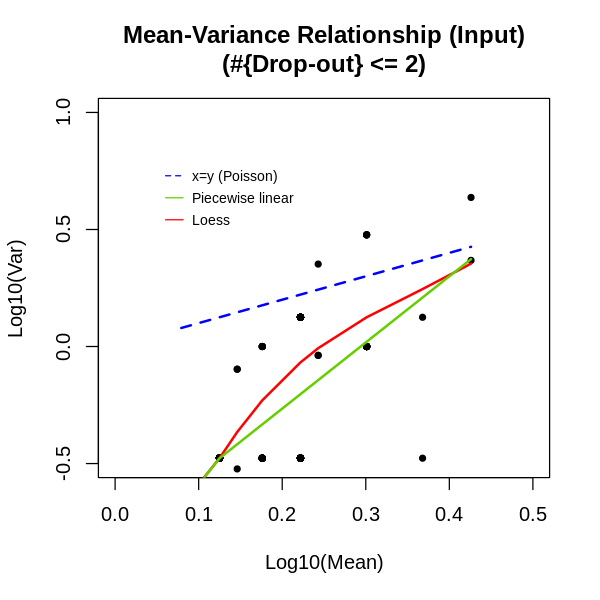

In [45]:
### arrange data and set knots for piecewise linear regression
df = df3 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q2, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.85
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  0.5),
     ylim=c(-0.5,  1.0))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 0.8, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.14613”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.029963”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.7254e-17”

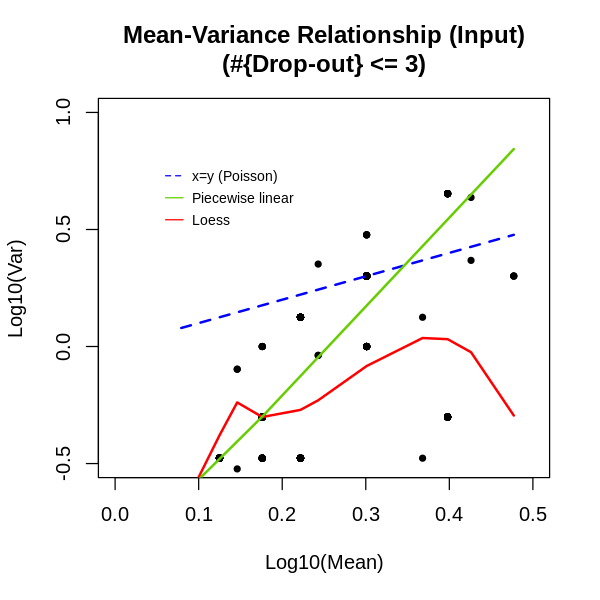

In [46]:
### arrange data and set knots for piecewise linear regression
df = df4 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q2, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.85
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 3)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  0.5),
     ylim=c(-0.5,  1.0))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 0.8, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

## Mean-variance relationship (Dex)

In [47]:
dat = dat_cnt_dex_chr17
head(dat, 2)

Chrom,Start,End,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex,cnt_na,Mean,Var,log10mu,log10var
chr17,10000156,10001172,2,NA,NA,NA,3,2,NA,0.30103,NA
chr17,10000156,10001173,1,NA,NA,NA,3,1,NA,0.00000,NA


In [48]:
df1 = dat %>% dplyr::filter(cnt_na==0) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df2 = dat %>% dplyr::filter(cnt_na<=1) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df3 = dat %>% dplyr::filter(cnt_na<=2) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df4 = dat %>% dplyr::filter(cnt_na<=3) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))

In [53]:
range(df4$log10mu)

[1] 0.09691001 1.30103000

In [54]:
range(df4$log10var)

[1] -0.602060  2.761928

In [49]:
cat("\n",
    "#{Drop-out==0} =", nrow(df1), "\n",
    "#{Drop-out<=1} =", nrow(df2), "\n",
    "#{Drop-out<=2} =", nrow(df3), "\n",
    "#{Drop-out<=3} =", nrow(df4), "\n")


 #{Drop-out==0} = 4985 
 #{Drop-out<=1} = 27791 
 #{Drop-out<=2} = 124492 
 #{Drop-out<=3} = 124492 


In [52]:
qs = quantile(df1$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.24303805 0.35218252 0.47712125 1.30103000

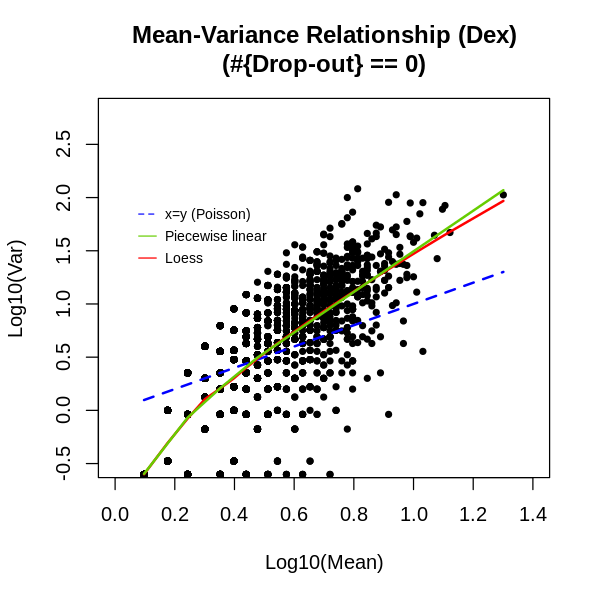

In [58]:
### arrange data and set knots for piecewise linear regression
df = df1 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship (Dex)\n(#{Drop-out} == 0)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.4),
     ylim=c(-0.5,  2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

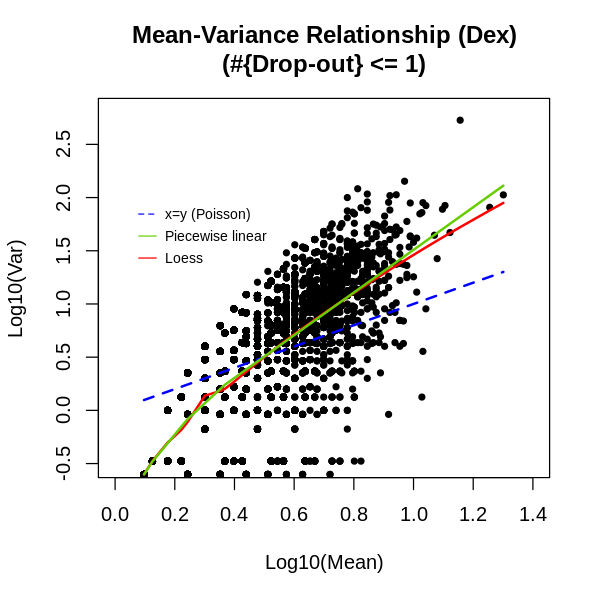

In [59]:
### arrange data and set knots for piecewise linear regression
df = df2 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship (Dex)\n(#{Drop-out} <= 1)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.4),
     ylim=c(-0.5,  2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [60]:
qs = quantile(df3$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.17609126 0.17609126 0.35218252 1.30103000

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.090889”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.085202”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.0994e-16”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.0020937”

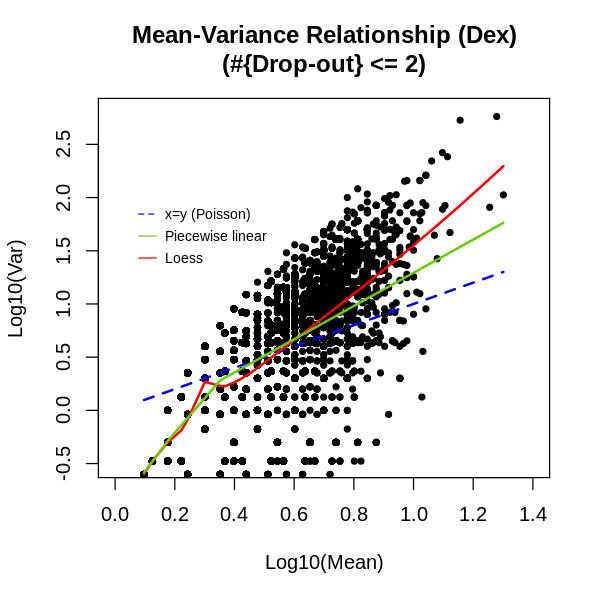

In [61]:
### arrange data and set knots for piecewise linear regression
df = df3 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q2", "q3")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship (Dex)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.4),
     ylim=c(-0.5,  2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

## Mean-variance relationship (Join)

In [62]:
dat = dat_cnt_join_chr17
head(dat, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,...,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex,cnt_na,Mean,Var,log10mu,log10var
chr17,10000160,10001059,1,NA,NA,NA,NA,NA,1,...,NA,NA,NA,NA,NA,11,1,0,0,-Inf
chr17,10000167,10001087,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11,1,0,0,-Inf


In [69]:
table(dat$cnt_na)


      2       3       4       5       6       7       8       9      10      11 
      1      16      89     397    1236    4091   13188   45611  181293  918498 
     12 
9682468 

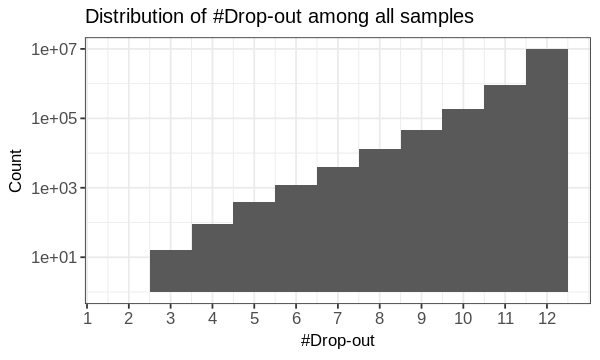

In [68]:
gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among all samples")
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
options(repr.plot.height=3, repr.plot.width=5)
gpt = gpt + scale_x_continuous(breaks=1:12) + scale_y_log10()
gpt

In [71]:
df1 = dat %>% dplyr::filter(cnt_na<=6) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df2 = dat %>% dplyr::filter(cnt_na<=7) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df3 = dat %>% dplyr::filter(cnt_na<=8) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df4 = dat %>% dplyr::filter(cnt_na<=9) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))

In [76]:
cat("\n",
    "#{Drop-out==0} =", nrow(df1), "\n",
    "#{Drop-out<=1} =", nrow(df2), "\n",
    "#{Drop-out<=2} =", nrow(df3), "\n",
    "#{Drop-out<=3} =", nrow(df4), "\n")


 #{Drop-out==0} = 1710 
 #{Drop-out<=1} = 5560 
 #{Drop-out<=2} = 17098 
 #{Drop-out<=3} = 51397 


In [77]:
range(df4$log10mu)

[1] 0.05115252 1.13830270

In [78]:
range(df4$log10var)

[1] -0.903090  2.334741

In [79]:
qs = quantile(df1$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.05115252 0.23408321 0.33099322 0.43933269 1.08432089

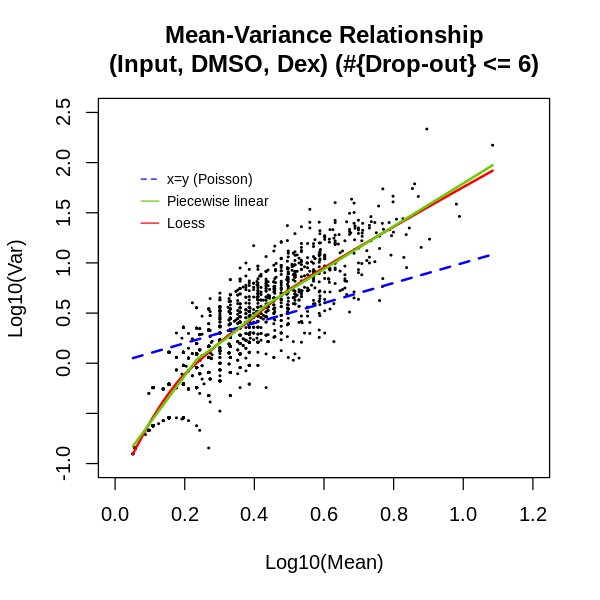

In [93]:
### arrange data and set knots for piecewise linear regression
df = df1 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     cex=0.3,
     pch=20, 
     main="Mean-Variance Relationship\n(Input, DMSO, Dex) (#{Drop-out} <= 6)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.2),
     ylim=c(-1.0,  2.5))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [84]:
qs = quantile(df2$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.05115252 0.17609126 0.26884531 0.39794001 1.08432089

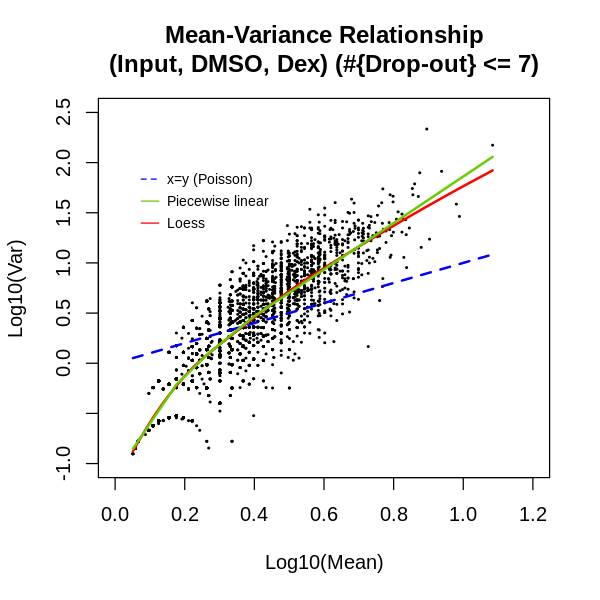

In [94]:
### arrange data and set knots for piecewise linear regression
df = df2 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     cex=0.3,
     pch=20, 
     main="Mean-Variance Relationship\n(Input, DMSO, Dex) (#{Drop-out} <= 7)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.2),
     ylim=c(-1.0,  2.5))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [86]:
qs = quantile(df3$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.05115252 0.14612804 0.25527251 0.34242268 1.08432089

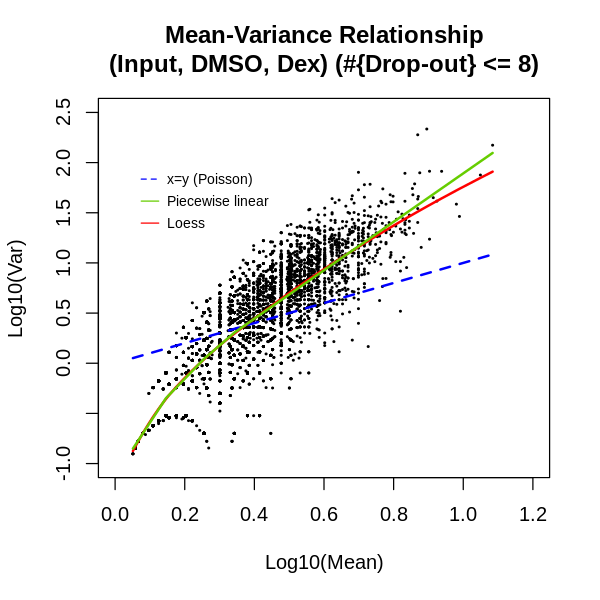

In [95]:
### arrange data and set knots for piecewise linear regression
df = df3 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     cex=0.3,
     pch=20, 
     main="Mean-Variance Relationship\n(Input, DMSO, Dex) (#{Drop-out} <= 8)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.2),
     ylim=c(-1.0,  2.5))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [88]:
qs = quantile(df4$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.05115252 0.09691001 0.20411998 0.30103000 1.13830270

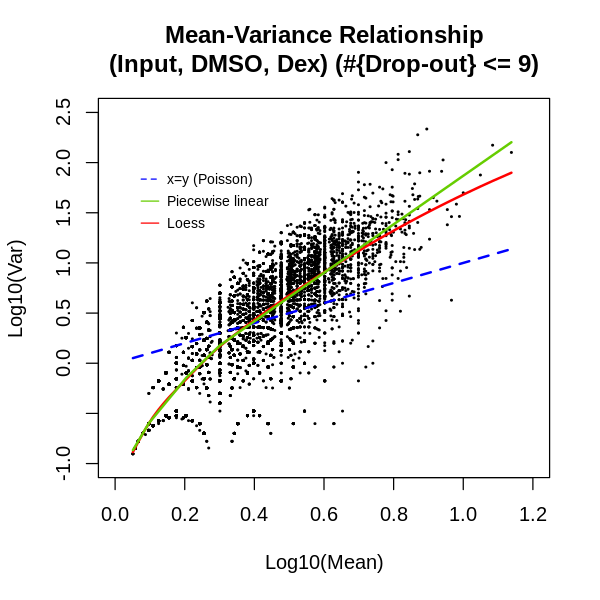

In [96]:
### arrange data and set knots for piecewise linear regression
df = df4 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     cex=0.3,
     pch=20, 
     main="Mean-Variance Relationship\n(Input, DMSO, Dex) (#{Drop-out} <= 9)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.2),
     ylim=c(-1.0,  2.5))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.05, 2.0, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [101]:
dat = dat_cnt_join_chr17
head(dat)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,...,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex,cnt_na,Mean,Var,log10mu,log10var
chr17,10000160,10001059,1,NA,NA,NA,NA,NA,1,...,NA,NA,NA,NA,NA,11,1.0,0.0,0.0000000,-Inf
chr17,10000167,10001087,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11,1.0,0.0,0.0000000,-Inf
chr17,10000256,10001171,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,12,1.0,NA,0.0000000,NA
chr17,10000405,10001490,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,12,1.0,NA,0.0000000,NA
chr17,10000434,10001419,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,12,1.0,NA,0.0000000,NA
chr17,10000489,10001383,1,NA,NA,NA,NA,2,NA,...,NA,NA,NA,NA,NA,11,1.5,0.5,0.1760913,-0.30103


In [ ]:
dat = dat_cnt_join_chr17

In [102]:
dat = dat_cnt_join_chr17
df1 = dat %>% dplyr::filter(cnt_na<=6) %>% filter_all(all_vars(!is.infinite(.)))

In [103]:
head(df1, 10)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,...,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex,cnt_na,Mean,Var,log10mu,log10var
chr17,10306410,10307313,1,NA,1,1,NA,NA,NA,...,NA,3,2,9,4,6,3.000000,8.3333333,0.4771213,0.92081875
chr17,10862324,10863188,2,1,NA,1,1,7,2,...,NA,3,NA,NA,2,5,2.375000,3.9821429,0.3756636,0.60011684
chr17,11636660,11637592,1,1,NA,1,NA,2,NA,...,NA,NA,NA,3,1,6,1.428571,0.6190476,0.1549020,-0.20827594
chr17,14069115,14070113,1,NA,1,NA,1,1,2,...,NA,2,1,2,4,3,1.600000,0.9333333,0.2041200,-0.02996322
chr17,14309020,14309942,1,1,NA,NA,NA,5,NA,...,NA,1,NA,3,3,6,2.142857,2.4761905,0.3309932,0.39378405
chr17,14737988,14738746,1,NA,NA,NA,NA,2,1,...,NA,7,NA,1,1,6,2.000000,5.0000000,0.3010300,0.69897000
chr17,14738153,14739079,1,NA,NA,NA,NA,3,NA,...,2,3,1,2,3,6,2.142857,0.8095238,0.3309932,-0.09177037
chr17,15412493,15413391,1,1,NA,NA,NA,NA,NA,...,1,2,1,2,1,6,1.285714,0.2380952,0.1091445,-0.62324929
chr17,15490343,15491446,1,NA,NA,NA,NA,1,NA,...,3,1,1,2,1,6,1.428571,0.6190476,0.1549020,-0.20827594
chr17,15505964,15507039,1,NA,NA,NA,NA,6,NA,...,NA,1,3,2,4,6,2.571429,3.6190476,0.4101745,0.55859430


In [105]:
tail(df1, 10)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,...,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex,cnt_na,Mean,Var,log10mu,log10var
chr17,78141829,78142820,NA,NA,NA,NA,NA,NA,1,...,3,3,3,2,2,6,2.428571,0.6190476,0.3853509,-0.20827594
chr17,78141829,78142821,NA,NA,NA,NA,NA,NA,2,...,4,3,4,2,1,6,2.714286,1.2380952,0.4336556,0.09275405
chr17,78141926,78142931,NA,NA,NA,NA,NA,NA,2,...,5,1,2,2,9,6,3.285714,7.9047619,0.5166298,0.89788879
chr17,79026761,79027685,NA,NA,NA,NA,NA,NA,1,...,3,1,3,3,2,6,2.142857,0.8095238,0.3309932,-0.09177037
chr17,79038208,79039232,NA,NA,NA,NA,NA,NA,1,...,4,3,1,1,5,6,3.000000,4.3333333,0.4771213,0.63682210
chr17,79038507,79039465,NA,NA,NA,NA,NA,NA,5,...,1,1,4,3,5,6,2.857143,3.4761905,0.4559320,0.54110357
chr17,79295067,79296069,NA,NA,NA,NA,NA,NA,1,...,1,5,1,5,4,6,2.571429,3.9523810,0.4101745,0.59685880
chr17,79573546,79574506,NA,NA,NA,NA,NA,NA,1,...,2,1,1,1,1,6,1.285714,0.2380952,0.1091445,-0.62324929
chr17,8382738,8383639,NA,NA,NA,NA,NA,NA,2,...,1,3,1,1,2,6,1.571429,0.6190476,0.1962946,-0.20827594
chr17,9907746,9908608,NA,NA,NA,NA,NA,NA,1,...,3,1,2,1,1,6,2.000000,2.3333333,0.3010300,0.36797679


In [104]:
nrow(df1)

[1] 1710

In [ ]:
df1 = dat %>% dplyr::filter(cnt_na<=6) %>% dplyr::select(Chrom, Start, Endlog10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df2 = dat %>% dplyr::filter(cnt_na<=7) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df3 = dat %>% dplyr::filter(cnt_na<=8) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df4 = dat %>% dplyr::filter(cnt_na<=9) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))